<a href="https://colab.research.google.com/github/PiretKaris/wotech-first/blob/main/collab_17_08_2024_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Understanding the data

In [ ]:
import pandas as pd

In [3]:
advertising = pd.read_csv('/content/tvmarketing.csv')

# TV - advertising budget spent on TV marketing
# Sales - how much we have sold (revenue, income)

In [4]:
advertising.head() #first 5 rows

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


In [5]:
advertising.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,14.022500
std,85.854236,5.217457
min,0.700000,1.600000
25%,74.375000,10.375000
50%,149.750000,12.900000
75%,218.825000,17.400000
max,296.400000,27.000000


### Regression plot

In [8]:
import seaborn as sns

<Axes: xlabel='TV', ylabel='Sales'>

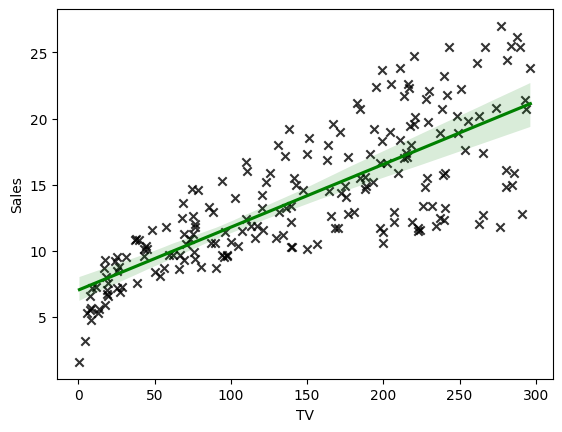

In [9]:
sns.regplot(
    data=advertising,
    x='TV',
    y="Sales",
    ci=99,
    marker="x",
    color="black",
    line_kws=dict(color="green"))

In [10]:
# Pearson correlation koefficient
advertising.corr() #calculate corr for whole dataframe

,TV,Sales
TV,1.000000,0.782224
Sales,0.782224,1.000000


In [12]:
advertising['TV'].corr(advertising['Sales']) #positive, strong

0.7822244248616061

### SUPERVISED VS UNSUPERVISED

![jupyter.png](https://miro.medium.com/v2/resize:fit:960/1*31iqrQyCqIuuGPLUK_BjMQ.png)

# Training linear regression model

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

In [13]:
# Preparing X and Y
X = advertising.drop('Sales', axis=1) #independent variable
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [14]:
Y = advertising.drop('TV', axis=1) #the outcome, dependent
Y.head()

,Sales
0,22.1
1,10.4
2,9.3
3,18.5
4,12.9


# Train/Test sets

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size = 0.7, random_state=42)

In [17]:
X_train

,TV
169,284.3
97,184.9
31,112.9
12,23.8
35,290.7
...,...
106,25.0
14,204.1
92,217.7
179,165.6


In [18]:
# COLUMN - FEATURE
# ROW - OBSERVATION

### Train the model

In [19]:
from sklearn.linear_model import LinearRegression #Import the model

In [20]:
model = LinearRegression() #Initialize the model

In [21]:
model.fit(X_train, y_train) #Fit the model

LinearRegression()

In [22]:
### Y = mX + b ###

print(f'Model intercept is: {model.intercept_}')
print(f'Model coefficient is: {model.coef_}')

Model intercept is: [7.23945983]
Model coefficient is: [[0.0464078]]


### A prediction

In [31]:
my_new_budget = [[200]] #2D array dataset

my_predicted_sales = model.predict(my_new_budget)

print(f'When the new budget is {my_new_budget[0][0]}, then predicted sales are {round(my_predicted_sales[0][0])}.')

When the new budget is 200, then predicted sales are 17.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
X_test.head()

,TV
95,163.3
15,195.4
30,292.9
158,11.7
128,220.3


In [27]:
y_pred = model.predict(X_test)

In [28]:
final_df = pd.DataFrame()
final_df['TV'] = X_test
final_df['Actual_sales'] = y_test
final_df['Predicted_sales'] = y_pred

In [29]:
final_df['ABS_Error_Actual_vs_Predicted'] = abs(final_df['Actual_sales']-final_df['Predicted_sales'])

In [30]:
final_df.head()

,TV,Actual_sales,Predicted_sales,ABS_Error_Actual_vs_Predicted
95,163.3,16.9,14.817854,2.082146
15,195.4,22.4,16.307544,6.092456
30,292.9,21.4,20.832305,0.567695
158,11.7,7.3,7.782431,0.482431
128,220.3,24.7,17.463099,7.236901




```
# This is formatted as code
```



# Visualize the results


In [33]:
final_df.reset_index(inplace=True)

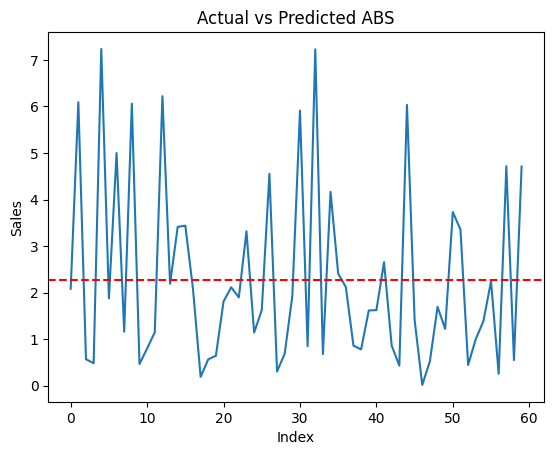

In [42]:
import matplotlib.pyplot as plt

plt.plot(final_df.index, final_df.ABS_Error_Actual_vs_Predicted)
plt.title('Actual vs Predicted ABS')
plt.xlabel('Index')
plt.ylabel('Sales')
plt.axhline(final_df['ABS_Error_Actual_vs_Predicted'].mean(), linestyle='dashed', color='red')

In [47]:
# Mean absolute error

from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)

In [48]:
print(f'Mean absolute error is {mae}.') # average distance between real and predicted data

Mean absolute error is 2.2758809050205113.


In [50]:
# R2

from sklearn.metrics import r2_score, mean_squared_error

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean squared error is {mse}.')
print(f'R2 score is {r2}.')

Mean squared error is 8.970991242413614.
R2 score is 0.6714477229302764.
